# Correlation in Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

Correlation is a measure of the direction and strength of a relationship. In this case, we are looking at two time series. Measurements are from -1 to 1 with 0 meaning no relationship or zero correlation between the two series.  1 means a perfect, positive correlation, and -1 means a perfect, negative correlation.  High correlations are toward 1 or -1 whereas low correlations are toward 0. In time series, one must be cautioned when viewing correlation, given the time period. You can imagine that on one day, there is strong, positive correlation but that the very next day, it could be a different story about the relationship between the two series.

Let's go through some examples of low, medium, and high correlations that are both positive and negative. We will use some simple examples.

## Low Correlation

### Google trends of "freedom" and "choice"

In [2]:
# Read in data
# https://trends.google.com/trends/?geo=US , google trends, search the word "freedom" and "choice"
freedom_choice = pd.read_csv("/Users/karenyang/Desktop/section_2/freedom_choice.csv", skiprows=1)

In [3]:
freedom_choice.head()

,Week,freedom: (United States),choice: (United States)
0,2014-10-12,44,45
1,2014-10-19,45,46
2,2014-10-26,46,45
3,2014-11-02,49,47
4,2014-11-09,50,46


In [4]:
col_names = ['Week','freedom', 'choice']
freedom_choice.columns = col_names

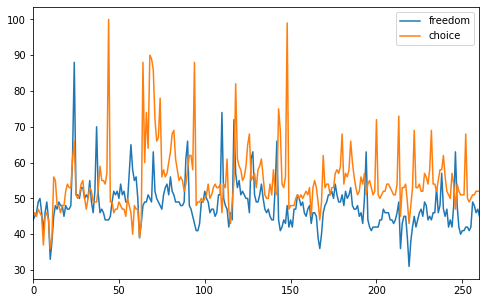

In [5]:
freedom_choice.plot(figsize=(8,5))

In [6]:
freedom_choice.describe()

,freedom,choice
count,261.000000,261.000000
mean,48.160920,54.609195
std,6.287118,9.094406
min,31.000000,36.000000
25%,45.000000,50.000000
50%,48.000000,53.000000
75%,51.000000,57.000000
max,88.000000,100.000000


In [7]:
freedom_choice.head()

,Week,freedom,choice
0,2014-10-12,44,45
1,2014-10-19,45,46
2,2014-10-26,46,45
3,2014-11-02,49,47
4,2014-11-09,50,46


In [8]:
freedom_choice['Week'] = pd.to_datetime(freedom_choice['Week'], infer_datetime_format=True )

In [9]:
freedom_choice.set_index('Week', inplace=True)

In [10]:
freedom_choice.head()

,freedom,choice
Week,,
2014-10-12,44,45
2014-10-19,45,46
2014-10-26,46,45
2014-11-02,49,47
2014-11-09,50,46


In [11]:
# Perform correlation
freedom_choice['freedom'].corr(freedom_choice['choice'])

0.15326158201930437

### Google Trend in "globalism" and "localism"

In [12]:
# Read in data
# https://trends.google.com/trends/?geo=US , google trends, search the word "globalism" and "localism"

global_local = pd.read_csv("/Users/karenyang/Desktop/section_2/global_local.csv", skiprows=2)

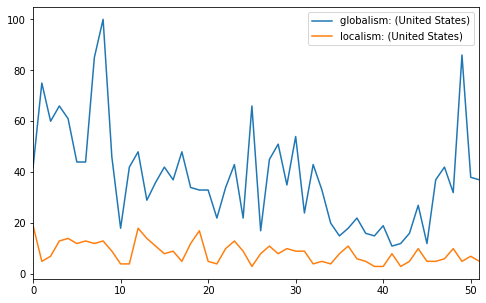

In [13]:
global_local.plot(figsize=(8,5))

In [14]:
global_local.describe()

,globalism: (United States),localism: (United States)
count,52.000000,52.000000
mean,38.211538,8.384615
std,20.091298,4.063968
min,11.000000,3.000000
25%,22.000000,5.000000
50%,36.500000,8.000000
75%,45.250000,11.000000
max,100.000000,19.000000


In [15]:
col_names = ['Week', 'Globalism', 'Localism']
global_local.columns = col_names

In [16]:
global_local.head()

,Week,Globalism,Localism
0,2018-10-14,42,19
1,2018-10-21,75,5
2,2018-10-28,60,7
3,2018-11-04,66,13
4,2018-11-11,61,14


In [17]:
global_local['Globalism'].corr(global_local['Localism'])

0.2696261652601036

In summary, both freedom and choice as well as globalism and localism show series that demonstrate low correlations of 15% and 27%, each respectively.

## Medium Correlation

### Adjusted Close Stock Prices for Bank of America and J.P. Morgan

In [18]:
# Bank of America example
df_bac = pd.read_csv("/Users/karenyang/Desktop/section_2/df_bankofamerica.csv", parse_dates=['Date'], index_col=0)
# JP Morgan example
df_jpm = pd.read_csv("/Users/karenyang/Desktop/section_2/df_jpmorgan.csv", parse_dates=['Date'], index_col=0)
df_jpm.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


In [19]:
frames = [df_bac, df_jpm]
banks = pd.concat(frames, axis=1)

In [20]:
banks.head()

,Adj Close Price,Adj Close Price
Date,,
1990-01-02,1.711862,3.610043
1990-01-03,1.725632,3.730377
1990-01-04,1.688917,3.745418
1990-01-05,1.652200,3.760463
1990-01-08,1.661379,3.760463


In [21]:
col_names = ['bac_closeprice', 'jpm_closeprice']
banks.columns = col_names
banks.head()

,bac_closeprice,jpm_closeprice
Date,,
1990-01-02,1.711862,3.610043
1990-01-03,1.725632,3.730377
1990-01-04,1.688917,3.745418
1990-01-05,1.652200,3.760463
1990-01-08,1.661379,3.760463


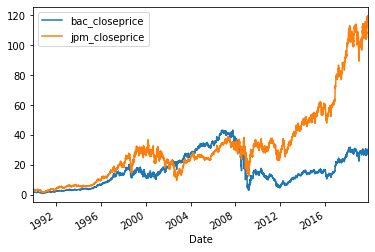

In [22]:
banks.plot()

In [23]:
banks['bac_closeprice'].corr(banks['jpm_closeprice'])

0.4835753896939429

### Rolling Window of Correlations

In [24]:
banks['bac_closeprice'].rolling(window=6).corr(banks['jpm_closeprice']).head(50)

Date
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-08         NaN
1990-01-09   -0.295338
1990-01-10    0.442023
1990-01-11    0.746380
1990-01-12    0.797359
1990-01-15    0.788352
1990-01-16    0.860473
1990-01-17    0.614086
1990-01-18    0.270300
1990-01-19   -0.691784
1990-01-22   -0.537018
1990-01-23   -0.651942
1990-01-24   -0.586375
1990-01-25   -0.474303
1990-01-26    0.549745
1990-01-29    0.717175
1990-01-30    0.966896
1990-01-31    0.970695
1990-02-01    0.908626
1990-02-02    0.816985
1990-02-05    0.727252
1990-02-06    0.732162
1990-02-07    0.491262
1990-02-08    0.788370
1990-02-09    0.750273
1990-02-12    0.401466
1990-02-13    0.181370
1990-02-14    0.722304
1990-02-15    0.949791
1990-02-16    0.961563
1990-02-20    0.860645
1990-02-21    0.762145
1990-02-22    0.172076
1990-02-23    0.219319
1990-02-26    0.203912
1990-02-27   -0.472087
1990-02-28   -0.460020
1990-03-01   -0.246647
1990-03-02    0.417032
1990-0

In [25]:
# Calculate rolling window of correlation
banks['bac_closeprice'].rolling(window=6).corr(banks['jpm_closeprice']).tail(50)

Date
2019-08-07    0.990664
2019-08-08    0.982003
2019-08-09    0.976365
2019-08-12    0.954119
2019-08-13    0.824910
2019-08-14    0.950340
2019-08-15    0.970285
2019-08-16    0.944658
2019-08-19    0.908134
2019-08-20    0.952658
2019-08-21    0.953390
2019-08-22    0.982858
2019-08-23    0.974054
2019-08-26    0.975664
2019-08-27    0.975332
2019-08-28    0.974800
2019-08-29    0.984820
2019-08-30    0.990319
2019-09-03    0.982095
2019-09-04    0.984344
2019-09-05    0.979902
2019-09-06    0.940763
2019-09-09    0.971785
2019-09-10    0.979876
2019-09-11    0.975871
2019-09-12    0.974525
2019-09-13    0.988001
2019-09-16    0.970663
2019-09-17    0.965367
2019-09-18    0.927700
2019-09-19    0.753383
2019-09-20    0.538430
2019-09-23    0.368496
2019-09-24    0.857796
2019-09-25    0.994708
2019-09-26    0.948718
2019-09-27    0.890823
2019-09-30    0.833329
2019-10-01    0.935323
2019-10-02    0.986856
2019-10-03    0.991700
2019-10-04    0.986584
2019-10-07    0.988812
2019-1

### Google Trend in Des Moines and New York

In [26]:
# Read in data
# https://trends.google.com/trends/?geo=US , google trends, search the word "materialism" and "consumerism"
des_ny = pd.read_csv("/Users/karenyang/Desktop/section_2/desmoines_ny.csv", skiprows=2)

In [27]:
des_ny.head()

,Month,Des Moines: (United States),New York: (United States)
0,2004-01,3,94
1,2004-02,3,91
2,2004-03,3,93
3,2004-04,3,93
4,2004-05,3,94


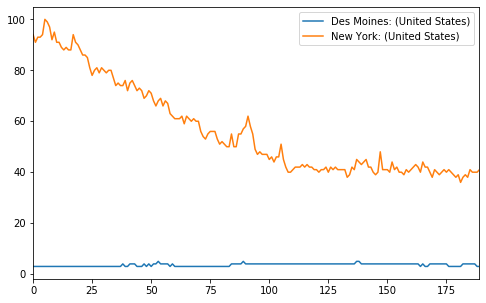

In [28]:
des_ny.plot(figsize=(8,5))

In [29]:
col_names = ['Month','Des Moines', 'New York']
des_ny.columns = col_names

In [30]:
des_ny['Month'] = pd.to_datetime(des_ny['Month'], infer_datetime_format=True )

In [31]:
des_ny.set_index('Month', inplace=True)

In [32]:
des_ny.head()

,Des Moines,New York
Month,,
2004-01-01,3,94
2004-02-01,3,91
2004-03-01,3,93
2004-04-01,3,93
2004-05-01,3,94


In [33]:
# Calculate correlation
des_ny['Des Moines'].corr(des_ny['New York'])

-0.5899151113665027

Searches for "Des Moines" and "New York" are found to have a negative, medium correlation of -0.59%.

## High Correlation

### Google Trend in "growth" and "economy"

In [34]:
# Read in data
# https://trends.google.com/trends/?geo=US , google trends, search the word "growth" and "economy"
growth_economy = pd.read_csv("/Users/karenyang/Desktop/section_2/growth_economy.csv", skiprows=1)

In [35]:
growth_economy.head()

,Week,growth: (United States),economy: (United States)
0,2019-01-06,90,51
1,2019-01-13,96,54
2,2019-01-20,93,54
3,2019-01-27,98,54
4,2019-02-03,98,56


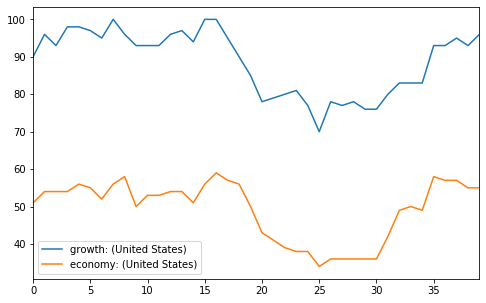

In [36]:
growth_economy.plot(figsize=(8,5))

In [37]:
growth_economy.describe()

,growth: (United States),economy: (United States)
count,40.000000,40.000000
mean,88.700000,49.200000
std,8.611858,7.997435
min,70.000000,34.000000
25%,80.000000,41.750000
50%,93.000000,52.500000
75%,96.000000,55.250000
max,100.000000,59.000000


In [40]:
col_names = ['Week', 'growth', 'economy']
growth_economy.columns = col_names

In [41]:
growth_economy.head()

,Week,growth,economy
0,2019-01-06,90,51
1,2019-01-13,96,54
2,2019-01-20,93,54
3,2019-01-27,98,54
4,2019-02-03,98,56


In [42]:
# Calculate correlation
growth_economy['growth'].corr(growth_economy['economy'])

0.9279092781100565

### Population and Crime for a city

You can imagine a scenario that a city has 850,000 in population and very little crime. As the population declines, the crime index increases, suggesting more crime. The intuition is that this is a strong, negative relationship.

In [43]:
pop = [850, 700, 650, 500, 450, 375, 350, 325, 300, 250]
crime = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [44]:
dict1 = {'population': pop, 'crime_index': crime}

In [45]:
df_popcrime = pd.DataFrame(dict1)
df_popcrime

,population,crime_index
0,850,10
1,700,20
2,650,30
3,500,40
4,450,50
5,375,60
6,350,70
7,325,80
8,300,90
9,250,100


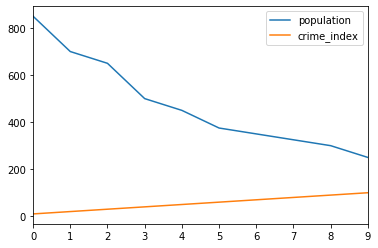

In [46]:
df_popcrime.plot()

In [47]:
# Calculate correlation
df_popcrime['population'].corr(df_popcrime['crime_index'])

-0.9596300060696952

Growth and economy are time series that have high, positive correlation of 93% whereas population and crime have high, negative correlation of -96%.

In [ ]:
# end